# GANs (Pansy flower)
* dataset: 17flowers (image_1281 to image_1360)

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torchvision import datasets, transforms, utils as vutils
from torch.utils.data import DataLoader
from PIL import Image
from sklearn.model_selection import train_test_split


In [45]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [48]:
# Create the dataset
dataroot = "data/17flowers"
workers = 2

image_size = 64
batch_size = 128

dataset = datasets.ImageFolder(
    root=dataroot,
    transform=transforms.Compose(
        [
            transforms.Resize(image_size),
            transforms.CenterCrop(image_size),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ]
    )
)

train_dataset, valid_dataset = train_test_split(dataset, test_size=0.1)

# Create the dataloader
train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=workers
)
valid_dataloader = DataLoader(
    valid_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=workers
)


Text(0.5, 1.0, 'Training Images')

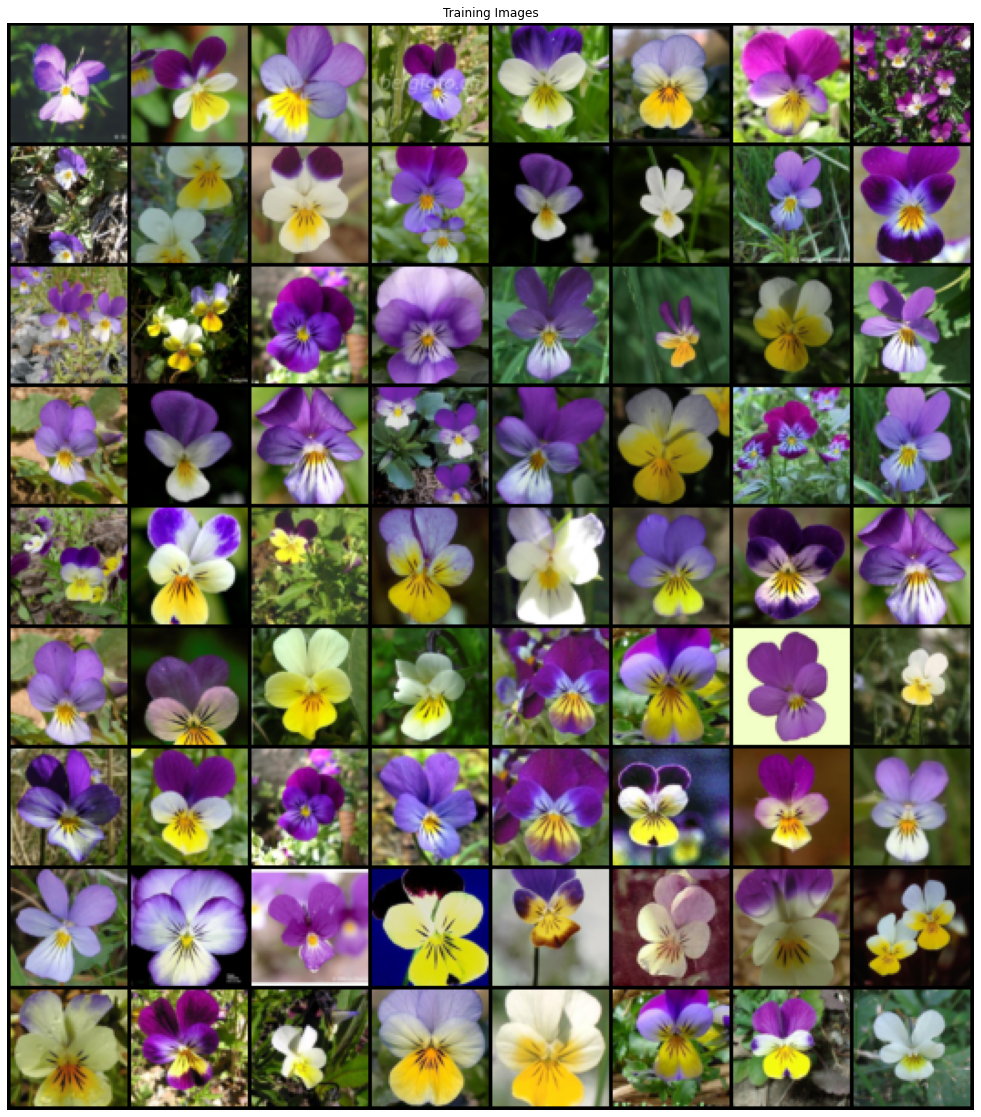

In [53]:
real_batch = next(iter(train_dataloader))
plt.figure(figsize=(20, 20))
plt.imshow(np.transpose(vutils.make_grid(real_batch[0], padding=2, normalize=True), (1, 2, 0)))
plt.axis("off")
plt.title("Training Images")


In [37]:
# # train_dataset = torchvision.datasets.MNIST(root='data/',
# #                                                train=True,
# #                                                transform=transforms.ToTensor(),
# #                                                download=True)

# def get_images():
#     images = []
#     shape = []
#     for i in range(1281, 1361):
#         filename = f"17flowers/image_{str(i).zfill(4)}.jpg"
#         img = Image.open(filename)
#         img = np.float32(img)
#         shape.append(img.shape)
#         img = np.resize(img, [64, 64, 3])
#         images.append(img)
#     print("Average shape", np.array(shape).mean(axis=0))

#     return np.array(images)

# images = get_images()
# train_images, valid_images = train_test_split(images, test_size=0.1)
# train_images.shape

Average shape [579.3125 542.4875   3.    ]


(72, 64, 64, 3)

In [30]:
#neural network for generative network
class Gen(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(Z_dim, H_dim),
            nn.ReLU(),
            nn.Linear(H_dim, X_dim),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.model(input)

In [ ]:
#neural network for discriminative model
class Dis(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(X_dim, H_dim),
            nn.ReLU(),
            nn.Linear(H_dim, 1),
            nn.Sigmoid()
        )
        
    def forward(self, input):
        return self.model(input)